## 이미지 처리 딥러닝
# 개와 고양이 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### 데이터 불러오기

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [6]:
train_generator

In [4]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]


In [5]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 1.0, 0.011764707)

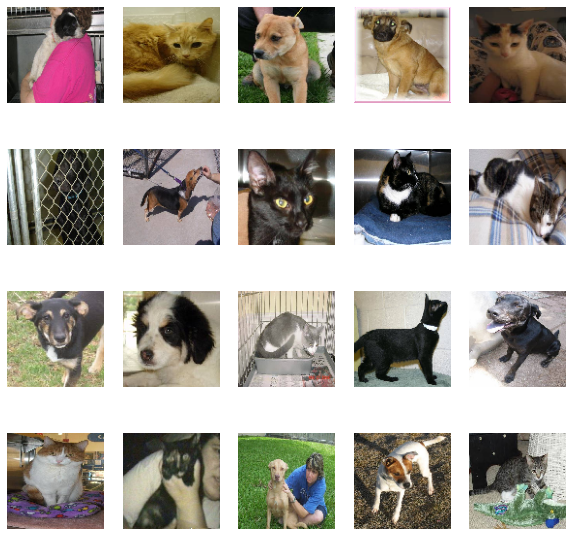

In [8]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [7]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


### CNN 적용

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(100,100,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)      

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 11s 109ms/step - loss: 0.7749 - acc: 0.5034 - val_loss: 0.6930 - val_acc: 0.5610
Epoch 2/10
100/100 [==============================] - 12s 116ms/step - loss: 0.6936 - acc: 0.5111 - val_loss: 0.6930 - val_acc: 0.5040
Epoch 3/10
100/100 [==============================] - 12s 116ms/step - loss: 0.6924 - acc: 0.5120 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 12s 117ms/step - loss: 0.6924 - acc: 0.5167 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 13s 132ms/step - loss: 0.6923 - acc: 0.5175 - val_loss: 0.6923 - val_acc: 0.6200
Epoch 6/10
100/100 [==============================] - 13s 134ms/step - loss: 0.6933 - acc: 0.5082 - val_loss: 0.6906 - val_acc: 0.5650
Epoch 7/10
100/100 [==============================] - 15s 145ms/step - loss: 0.6897 - acc: 0.5397 - val_loss: 0.6962 - val_acc: 0.5050
Epoch 8/10
100/100 [==============================] - 1

In [15]:
history2 = model.fit_generator(train_generator, epochs=10, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 11s 107ms/step - loss: 0.6120 - acc: 0.6625 - val_loss: 0.6322 - val_acc: 0.6590
Epoch 2/10
100/100 [==============================] - 13s 132ms/step - loss: 0.5808 - acc: 0.7045 - val_loss: 0.6393 - val_acc: 0.6550
Epoch 3/10
100/100 [==============================] - 12s 123ms/step - loss: 0.5855 - acc: 0.6835 - val_loss: 0.5760 - val_acc: 0.7060
Epoch 4/10
100/100 [==============================] - 13s 135ms/step - loss: 0.5474 - acc: 0.7275 - val_loss: 0.6274 - val_acc: 0.6720
Epoch 5/10
100/100 [==============================] - 14s 136ms/step - loss: 0.5452 - acc: 0.7310 - val_loss: 0.5820 - val_acc: 0.7010
Epoch 6/10
100/100 [==============================] - 14s 135ms/step - loss: 0.5089 - acc: 0.7585 - val_loss: 0.5743 - val_acc: 0.7060
Epoch 7/10
100/100 [==============================] - 14s 136ms/step - loss: 0.4941 - acc: 0.7550 - val_loss: 0.5703 - val_acc: 0.7270
Epoch 8/10
100/100 [==============================] - 1

In [17]:
history3 = model.fit(train_generator, epochs=1, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

100/100 [==============================] - 11s 115ms/step - loss: 0.4170 - acc: 0.8045 - val_loss: 0.6449 - val_acc: 0.6810


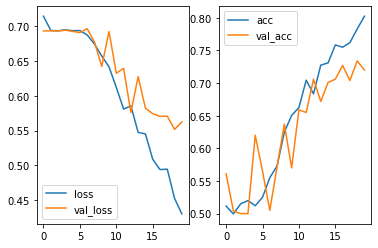

In [16]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'] + history2.history['loss'])
plt.plot(history.history['val_loss'] + history2.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'] + history2.history['acc'])
plt.plot(history.history['val_acc'] + history2.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [24]:
model.save('cats_and_dogs_model_1.h5')  # creates a HDF5 file

### Image Augmentation (이미지 증대)
- 케라스 창시자에게 배우는 딥러닝 (193쪽~)

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

In [46]:
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [37]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 150, 150, 3) (20,)
[0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]


In [38]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((150, 150, 3), dtype('float32'), 0.8635701, 0.0)

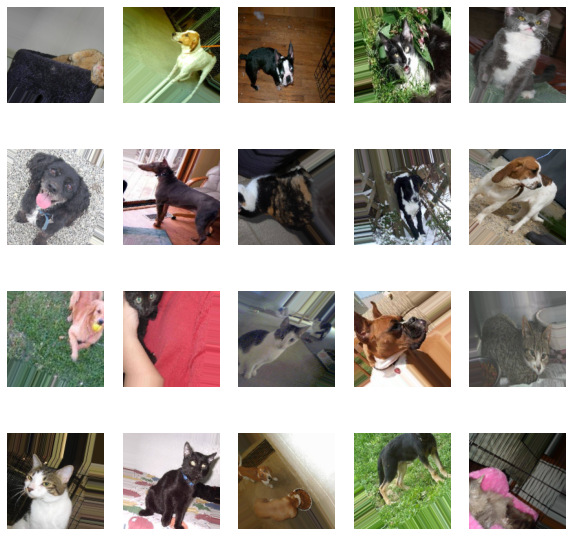

In [39]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [47]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [48]:
validation_generator = validation_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 128)      

In [50]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['acc'])

In [51]:
history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/40
100/100 [==============================] - 443s 4s/step - loss: 0.6997 - acc: 0.5144 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 2/40
100/100 [==============================] - 439s 4s/step - loss: 0.6953 - acc: 0.5185 - val_loss: 0.6746 - val_acc: 0.5770
Epoch 3/40
100/100 [==============================] - 535s 5s/step - loss: 0.6835 - acc: 0.5499 - val_loss: 0.6666 - val_acc: 0.5830
Epoch 4/40
100/100 [==============================] - 610s 6s/step - loss: 0.6731 - acc: 0.5769 - val_loss: 0.6458 - val_acc: 0.6150
Epoch 5/40
100/100 [==============================] - 606s 6s/step - loss: 0.6609 - acc: 0.6123 - val_loss: 0.6654 - val_acc: 0.5940
Epoch 6/40
100/100 [==============================] - 607s 6s/step - loss: 0.6495 - acc: 0.6279 - val_loss: 0.6653 - val_acc: 0.6060
Epoch 7/40
100/100 [==============================] - 601s 6s/step - loss: 0.6653 - acc: 0.6225 - val_loss: 0.6110 - val_acc: 0.6730
Epoch 8/40
100/100 [==============================] - 497s 5s/step - 

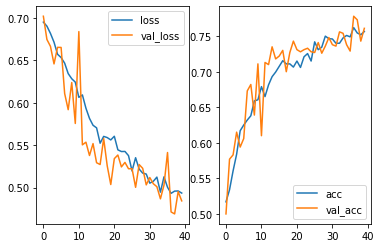

In [52]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [53]:
model.save('cats_and_dogs_model_2.h5')  # creates a HDF5 file

In [59]:
test_datagen = ImageDataGenerator(rescale=1/255.)

In [60]:
test_generator = test_datagen.flow_from_directory(
    'cats_and_dogs_small/test',
    target_size=(150,150),
    batch_size=20,
    shuffle=False, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 1000 images belonging to 2 classes.


In [61]:
pred_y = model.predict(test_generator)

In [62]:
pred_y.shape

(1000, 1)

In [68]:
(pred_y[:500,0]<0.5).sum()

333

In [69]:
(pred_y[500:,0]>0.5).sum()

410